# <font size="6pt" color="ff0000">Computer Vision and Convolutional Neural Networks</font>


Before we begin, let us import the necessary libraries. Also for this notebook, I am uploading all the images in a folder called **images** on my google drive (gdrive).

In [ ]:
import math
from skimage import io #, viewer
from scipy import fftpack

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from pathlib import Path

imagesPath =  "/content/gdrive/My Drive/Colab Notebooks/SEP740 Deep Learning Summer2024/convolutionNetworks/images/"

/usr/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# <font color="#0000FF">Human Eye - Rod and Cone Cells </font>

If you consider your eye as a camera (with a lens and photographic film), then rentina is the photographic film. Light passing through the eye lens, form colored (inverted) images on retina wall.



<Figure size 1000x1000 with 0 Axes>

(-0.5, 999.5, 871.5, -0.5)

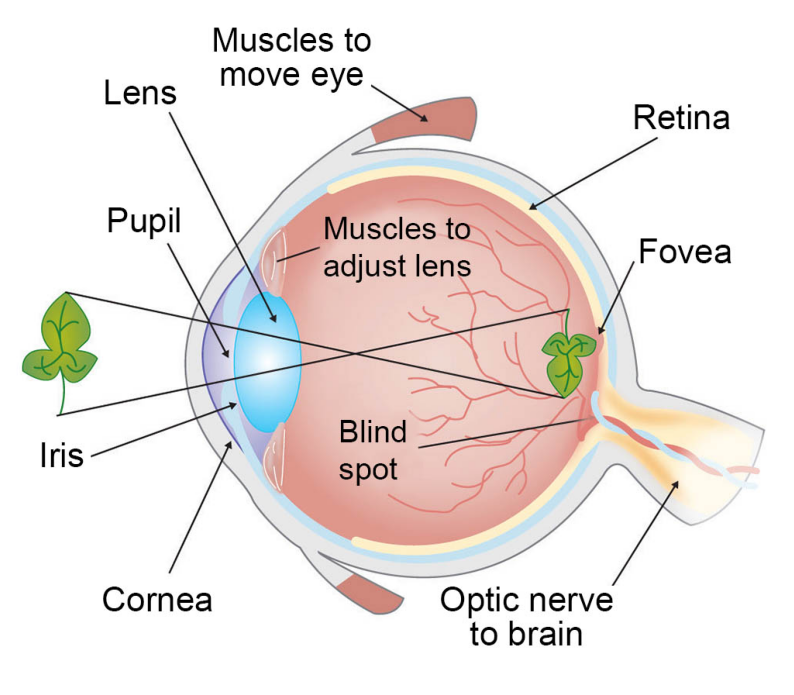

In [2]:
image1 = io.imread(imagesPath + 'eye-anatomy-1000.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()


The tissue forming the retina is made up of two types of cells -   
* Rods 
    * There are about 90 million rod cell in human retina
    * These cells have pigments which are sensitive to the brightness (intensity) part of light.
    * Rods are sensitive to light brightness (black - gray - white) part of light and work at low levels of light. 
    * We use these for night vision as only very low light (number of photons) can triger/activate a rod.
    * They do not contribute to color vision. 
    * This is the reason, we see almost everything in gray-scale at night (or in darker environments).
* Cones 
    * There are about 5 million rcone cell in human retina
    * These cells have pigments which are sensitive to the color (red, green and blue) part of light.
 


<Figure size 1000x1000 with 0 Axes>

(-0.5, 549.5, 441.5, -0.5)

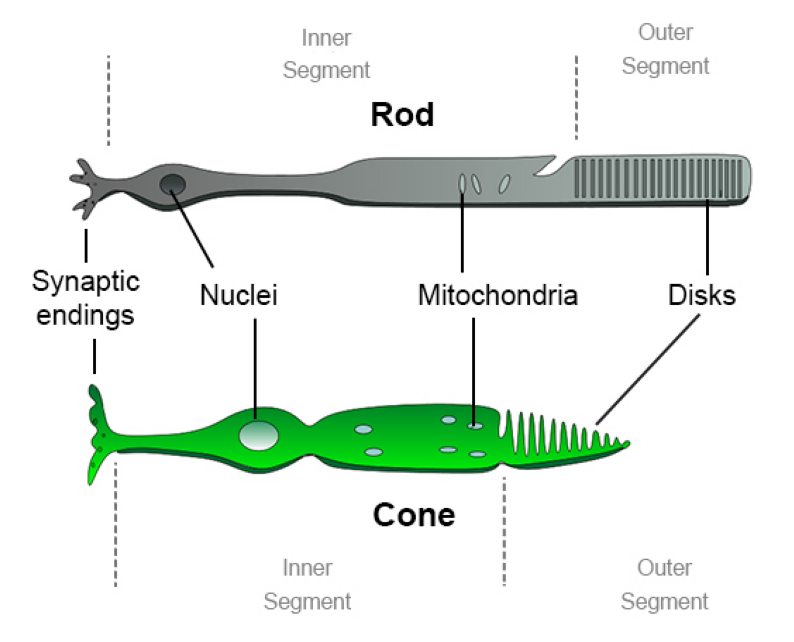

In [3]:
# # if you have uploaded the image in the contents folder locally on colab
# plt.figure(figsize=(10,10))
# plt.imshow(plt.imread('/content/rods-cones-550.jpg'))
# plt.axis('off')
# plt.show()

# if you have uploaded the image in a folder on your google drive
image1 = io.imread(imagesPath + 'rods-cones-550.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()



Cones are sesntive to the color part of light. A large number of these are packed near **fovea** (a small dpression weith in the neurosensory retina where the visual acuity is the highest and is responsible for the central vision).



<Figure size 1000x1000 with 0 Axes>

(-0.5, 2047.5, 1053.5, -0.5)

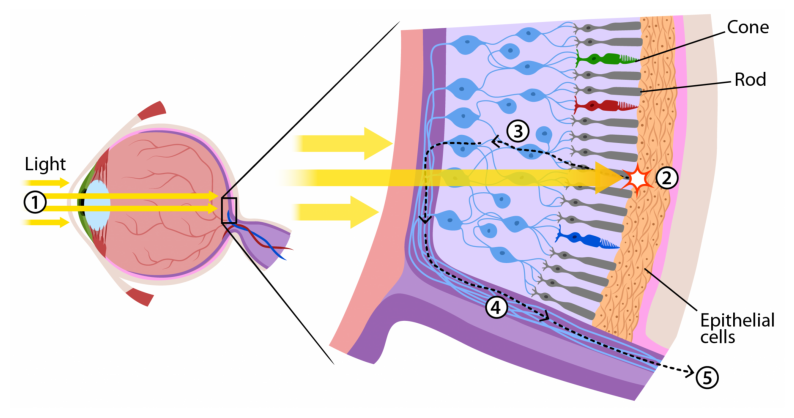

In [4]:
image1 = io.imread(imagesPath + 'Light-though-eye-big.png')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()


1.   Light moves through the lens of the eye to the back of the eye, which is the retina. Here, there are millions of rods and cones.
2.   When light hits the discs in the outer segment of the rods and cones, the little bits of light (photons) activate the cells. Rods can be activated in low light, but cones require much brighter light (many more photons). Most of the light not absorbed by the rods or cones is absorbed by the epithelial cells behind them.
> The discs of **rods** hold **rhodopsin** and the discs of **cones** hold **photopsin**. Both of these photoreceptor proteins are special molecules that change shape when activated by light. This shape change allows the proteins to activate a second special protein molecule that then starts causing other changes involved in sending a visual signal. For the signal to be sent through the cell, charged molecules called ions are let in and out of the cell in an action potential.
3.  When the signal reaches the inner end (left side) of the rods and cones, the signal is passed to sets of neural cells.
4.  The signal moves through neural cells in the optic nerve.
5.  The optic nerve will send this information to the brain, where separate signals can be processed so you see them as a complete image.

If you want more information, you can follow [Link1](https://www.cis.rit.edu/people/faculty/montag/vandplite/pages/chap_9/ch9p1.html#:~:text=Rods%20are%20responsible%20for%20vision,is%20populated%20exclusively%20by%20cones.) and/or [Link2](https://askabiologist.asu.edu/rods-and-cones).


## <font color='0000ff'>Working of the Visual Cortex and Convolution Neural Networks (CNNs)</font>

1981 Nobel Prize in Physiology and Medicine was awarded jointly to three scientists: to Roger W. Sperry "for his discoveries concerning the functional specialization of the cerebral hemispheres", and David H. Hubel and Torsten N. Wiesel "for their discoveries concerning information processing in the visual system".

[Roger Sperry's Work (1913 - 1994) - Caltech](https://www.nobelprize.org/prizes/medicine/1981/sperry/facts/)

Both human and animal brains have two halves with somewhat different functions. By 1960s, Sperry was able to reveal that. the left hemisphere is more geared toward abstract and analytical throught, calculations, and linguistic ability (Analytical and Logical side of the Brain), while the right hemisphere is more important for comprehending spatial patterns and complex sounds like music (Artistic and Imaginative side of the Brain).

[David Hubel (1926-2013) and Torsten Wiesel (1924-) - Harvard Medical School](https://www.nobelprize.org/prizes/medicine/1981/hubel/facts/)

Our vision works by the light around us being captured by a large number of light-sensitive cells located in the retinas at the back of our eyes. The light is converted into signals that are sent to the brain and there converted into visual impressions. David Hubel and Torsten Wiesel clarified how this process works during the 1960s: In the cerebral cortex, signals are analyzed in sequences by the cells with the specific tasks of interpreting contrasts, patterns, and movements. They showed that this ability develops in children during the initial period after birth.

Their work was based on Mamalian (Cat, Monkeys, etc.) brains to understand how the visual cortex works. They performed experiments involving giving different visual tasks to the animals and made measurements of any accompaying neural activity in the brains of these animals.

## A Typical Experiment


In a typical experiment, a cat was taken and given anesthesia (so that it cannot move). But her brain and other body parts are functioning as normal. They showed her a Light Bar on a screen (as shown in the picture). Micro-electrodes were used to measure the brain activity in the visual cortex part of the brain.

As shown in the picture, they noticed that there was a lot of activity in the visual cortex (a number neurons were activated - ion/electron firing) when a vertical bar was used. For the horizontal pattern, there was no electron firing.

So they experiment concluded that there must be some special group of neurons in the cat's brain which are firing when they see a vertical pattern.


<Figure size 1000x1000 with 0 Axes>

(-0.5, 639.5, 416.5, -0.5)

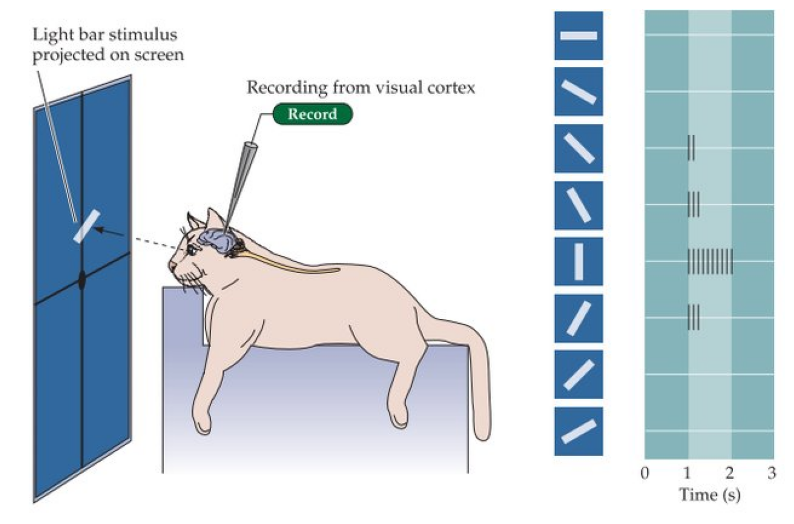

In [5]:
image1 = io.imread(imagesPath + 'Left-Experimental-setup-from-Hubel-Wiesel.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()

**Working of the Visual Corices of the Brain**

<Figure size 1000x1000 with 0 Axes>

(-0.5, 724.5, 591.5, -0.5)

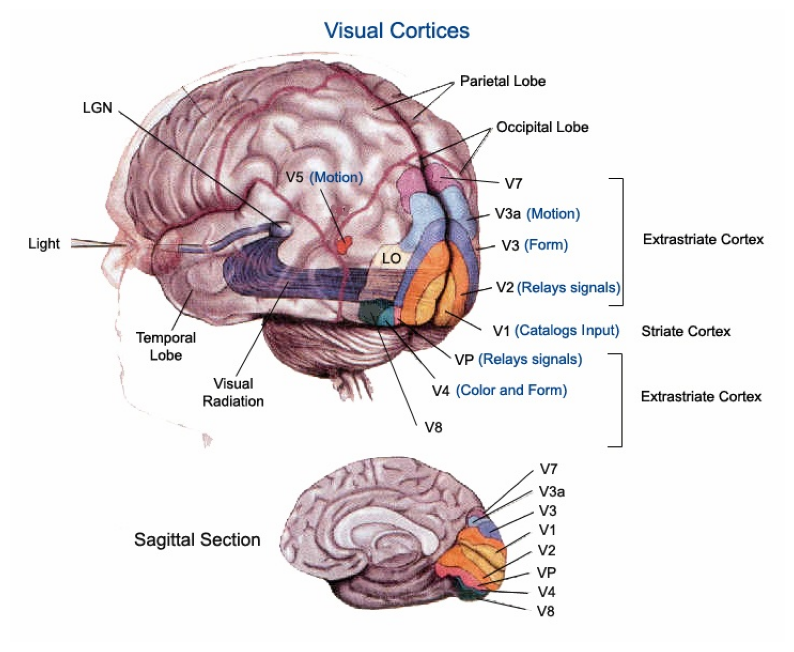

In [6]:
image1 = io.imread(imagesPath + 'Visual_cortex.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()


- V1 - Motion,
- V2 - Stereo,
- V3 - Color,
- V3a - Texture Segmentation,
- V3b - Segmentation, Grouping,
- V4 - Recognition,
- V7 - Face Recognition,
- MT - Attention,
- MST - Working Memory / Mental Imaging,



## <font color='0000ff'>From the Visual Cortex to the Convolution Neural Networks (CNNs)</font>

<Figure size 1000x1000 with 0 Axes>

(-0.5, 999.5, 481.5, -0.5)

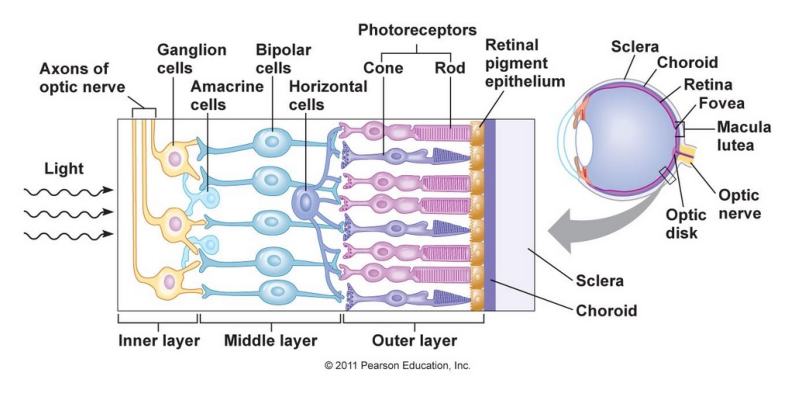

In [7]:
image1 = io.imread(imagesPath + 'Eye.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()



Inputs -> Coarse Features -> Finer Features -> More Finer Features -> ... -> Classification -> Output


<Figure size 1000x1000 with 0 Axes>

(-0.5, 1569.5, 573.5, -0.5)

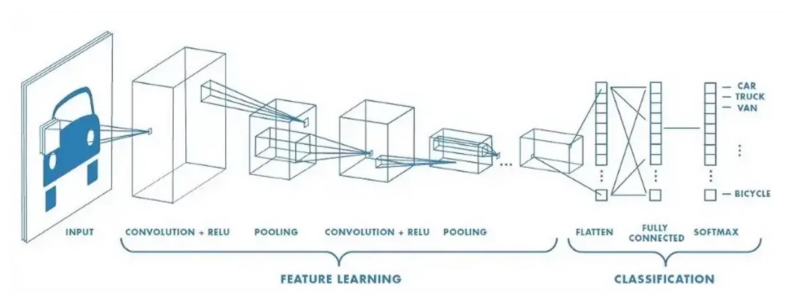

In [8]:
image1 = io.imread(imagesPath + 'conv4.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()

# How Do We Get Features (coarse or finer) Out From Images?

There are a large number of ways in which this "feature extraction" from images can be carried out. One way of doing this is through the use of filters. If you have used photo editing softwares such Photoshop or Gimp, then you already know what I mean. These software have function libraries to carry out such filtering.

If we want to implement such filtering to process images using **our own (Python / Java / C++ etc.) code**, then we need know how filters are "convoled" with images to process them. We need to know what "Convolution" is.

# What Is Convolution?

Mathematically, convolution is a mathematical operation on two functions ($f$ and $g$) that produces a third function ( $ f * g $ ) that expresses how the shape of one is modified by the other. In the figure below, the operations of *Convolution* $f * g$, *Cross-Correlation* $f \star g$ and *Auto-Correlation* $f \star f$ are shown. For the operations involving the function $f$ (assuming the height of $f$ is 1.0), the value of the result at 5 different points is indicated by the shaded area elow each point. The symmetry of $f$ is the reason $f * g$ and $g * f$ are identical in the figure.

The difference between convolution $f * g$ and correlation $f \star g$ is that the second function $g$ is flipped horizontally before sliding past the first function $f$ in case of convolution, and it is not flipped in case of correlation (as can be seen from the figure below).



<Figure size 1000x1000 with 0 Axes>

(-0.5, 799.5, 599.5, -0.5)

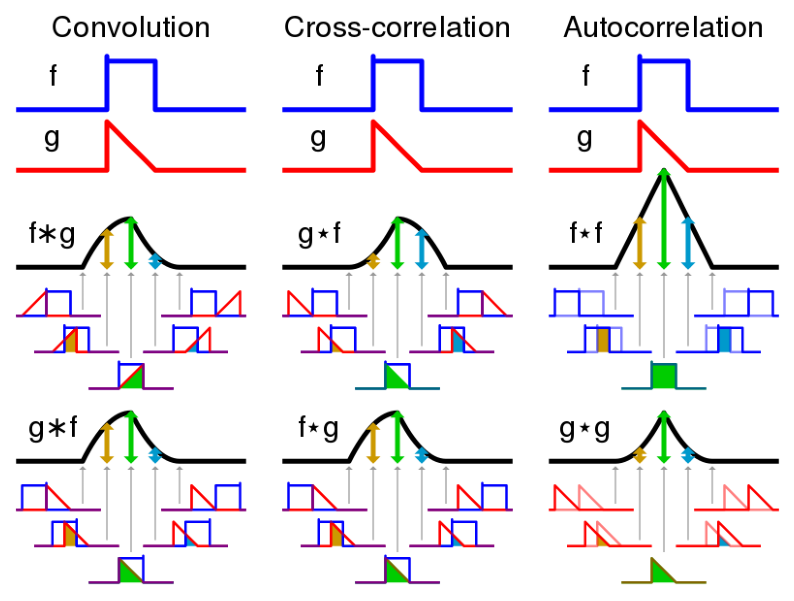

In [9]:
image1 = io.imread(imagesPath + 'Comparison_convolution_correlation.png')
plt.figure(figsize=(10,10))
plt.imshow(image1)
plt.axis('off')
plt.show()

# How Does 1D Convolution Work (Kernel Size 1)
Let's begin with the simplest case. We have 1D array / vector (data) and a kernel (filter) having got only one value. Applying a convolution on a 1D array performs the multiplication of the value in the kernel with every value in the input vector.

In [10]:
gifPath = Path(imagesPath + 'conv1dKernel1.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

Output hidden; open in https://colab.research.google.com to view.

# Increasing the Filter Size
Changing the kernel size will detect different sized features in the input vector. Also the size of the output vector (feature-map) will also change accordingly. The convolution is performed by multiplying each element to the kernel and then summing the products to get the final output value. It should be noticed that the kernel values are same in this case.

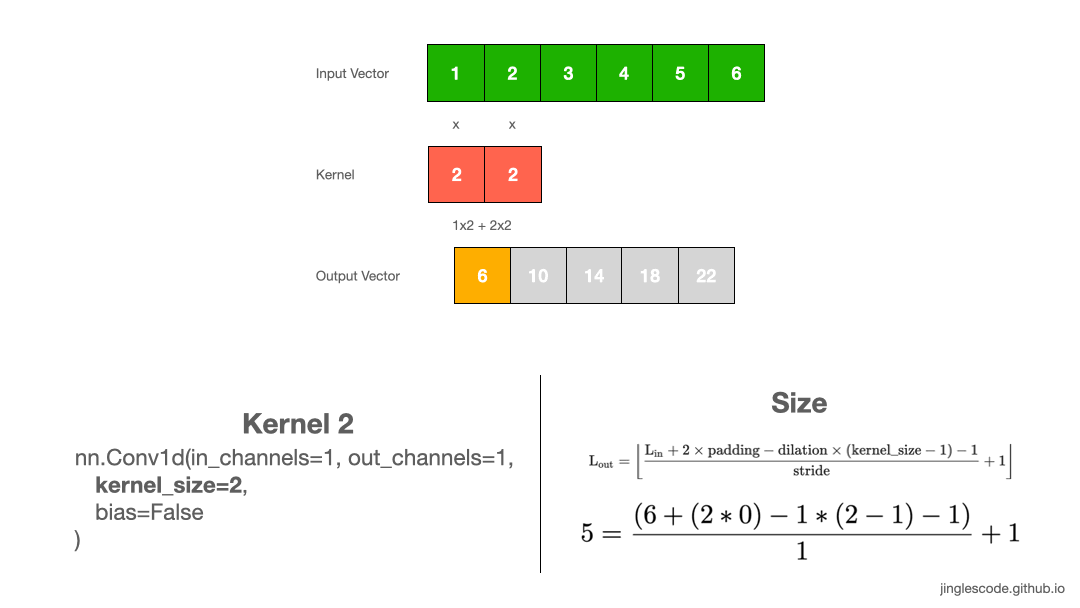

In [11]:
gifPath = Path(imagesPath + 'conv1dKernel2.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

Here is an example with kernel size 3. The kernel values are same.

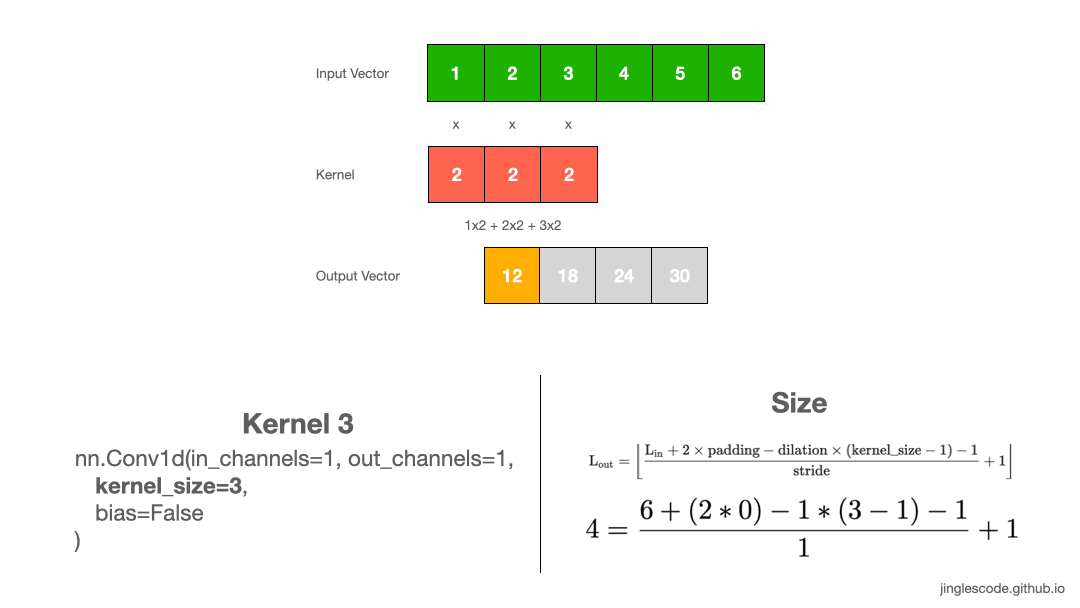

In [12]:
gifPath = Path(imagesPath + 'conv1dKernel3.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

# Zero Padding and Equal Sized Input - Output Vectors
As you might have noticed, as the kernel size is increased, the output vector (feature-map) size decreases. What if, we want to keep the sizes of the input and output vector same. In digital signal/image processing, this is achieved using **padding**. For example, for a kernel size 3, we can include an additional value before the beginning and after the end of the input vector. So, we have added padding to the input vector. When the padded values are zeros, it is called **Zero-Padding**. This is shown in the follwowing animation.


In [13]:
gifPath = Path(imagesPath + 'conv1dKernel3Padding0.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

Output hidden; open in https://colab.research.google.com to view.

# Changing the Stride - Step-size for sliding the kernel across the input
We have been slide the kernel by step size equal to 1 in the previous cases. However, this step-size can be changed to 2, 3, 4 ... and more. The step size taken by the kernel to slide past the input is called **Stride**. The effect of changing the stride is shown below:

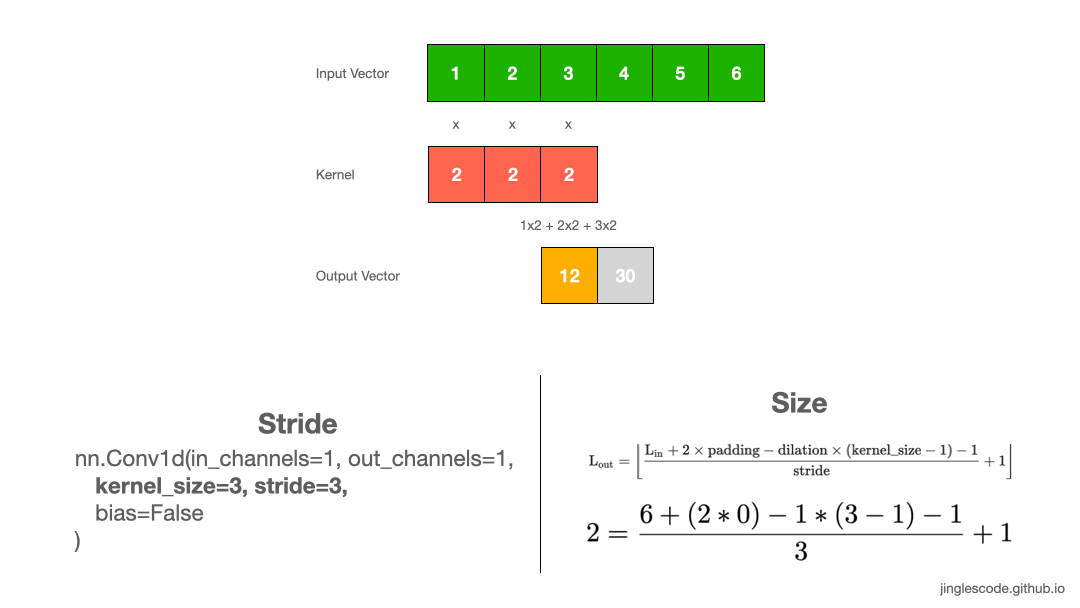

In [14]:
gifPath = Path(imagesPath + 'conv1dKernel3Stride3.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

We need to increase the stride, when we want to down-sample the input vector. Increasing te stride size to 2 will reduce the length of the output vector by half. This can be used to avoid pooling layers in concolutional neural networks.

# Changing the Dilation Parameter of the Kernel
Usually, there is no spacing in the kernel. In **dilated concolution**, the kernel is **inflated** by inserting spaces between the kernel elements, and a parameter is used to control the dilation rate. A dilation rate of 2 means that there is one empty space between the kernel elements. A convolution kernel with dilation 1 corresponds to a regular convolution.

Dilated kernels can help us make multi-resolution feature maps froms input vectors (images). This technique is commonly used in **Wavelets** based multi-resolution analysis (MRA).

The following animation shows a kernel with dilation paramater 2.

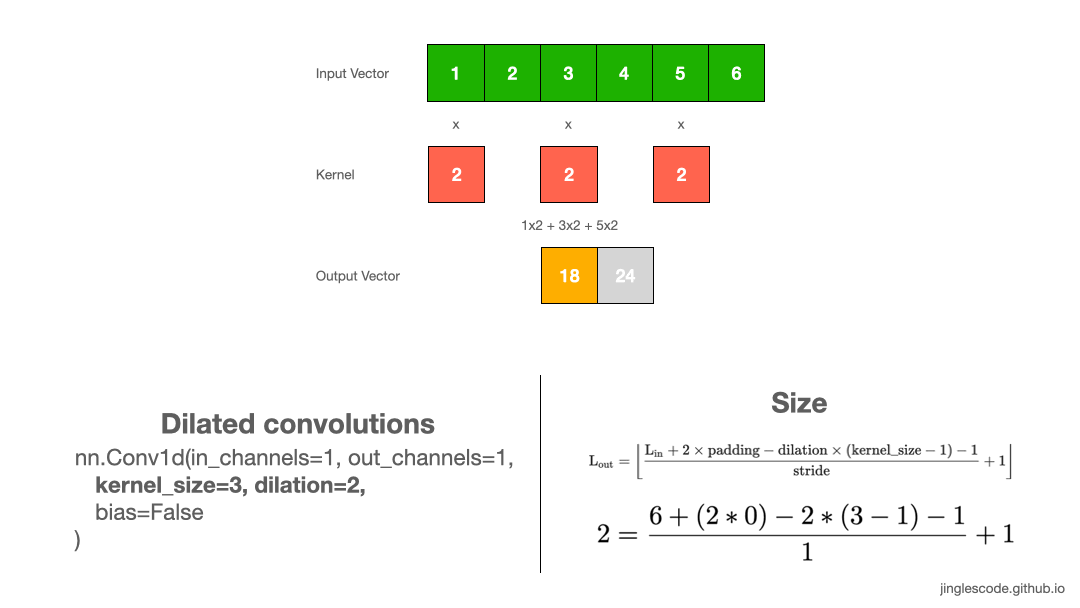

In [15]:
gifPath = Path(imagesPath + 'conv1dKernel3Dilation2.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

# 2D Convolution


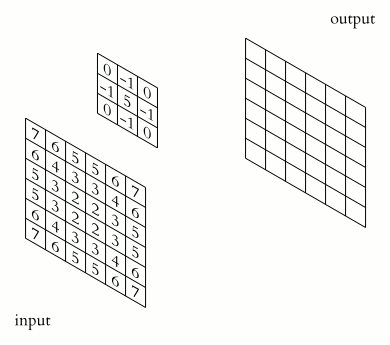

In [16]:
gifPath = Path(imagesPath + '2D_Convolution_Animation.gif')
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')


## <font color='green'>Implementation of Convolution</font>

In [17]:
def convolve2D(image, kernel):
  # convolve2D: a function to perform 2D convolution

  # flip the kernel to prepare it for convolution
  kernel = np.flipud(np.fliplr(kernel))
  # create an output image of same shape and type as that of the input image
  output = np.zeros_like(image)
  # add zero-padding to the given image and save it into a new 'paddedImage'

  # Add zero padding to the input image
  paddedImage  = np.zeros( (image.shape[0]+(kernel.shape[0]-1),
                          image.shape[1]+(kernel.shape[1]-1)))
  paddedImage [(kernel.shape[0]//2):-(kernel.shape[0]//2),
               (kernel.shape[1]//2):-(kernel.shape[1]//2)] = image
  # perform the convolution
  for x in range(image.shape[1]):
    for y in range(image.shape[0]):
      output[y,x] = (kernel*paddedImage[y:y+kernel.shape[0],
                                        x:x+kernel.shape[1]]).sum()
  return (output)


(512, 512)


(0.0, 1.0, 0.0, 1.0)

(-0.5, 511.5, 511.5, -0.5)

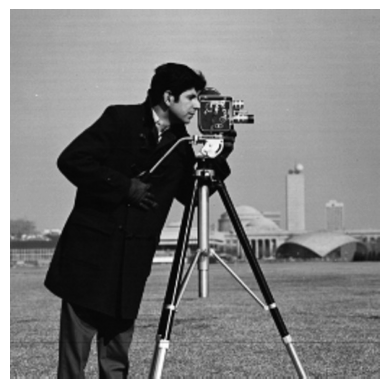

In [18]:
# image1 = io.imread("/content/gdrive/My Drive/Colab Notebooks/convolutionNetworks/images/cameraman.jpg")
# # image = tf.io.decode_(img1, channels=1)
image1 = io.imread(imagesPath + 'cameraman.jpg')
print(image1.shape)

plt.axis('off')
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
from matplotlib.rcsetup import reduce


# kernel = np.array([[1, 2, 3], [4,5,6],[7,8,9]])
# print(kernel)

# kernel = np.flipud(kernel)
# print(kernel)

# kernel = np.fliplr(kernel)
# print(kernel)

# Averaging (Mean) Filter

kernel = np.ones([25, 25])
# print(kernel)
fac = reduce(lambda x, y: x*y, np.shape(kernel))
# print(fac)
kernel = kernel / fac
# print(kernel)


(512, 512)


(-0.5, 511.5, 511.5, -0.5)

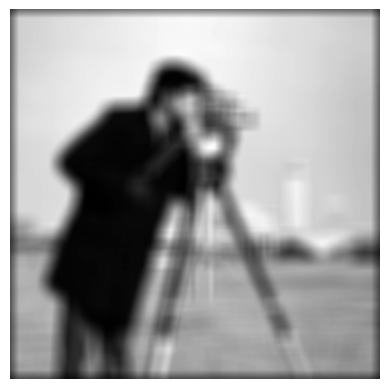

In [20]:
# convolve the image with the kernel (filter)
convImage = convolve2D(image1, kernel)
print(convImage.shape)

plt.imshow(convImage, cmap = 'gray')
plt.axis('off')
plt.show()

In [21]:
# Edge (vertical) Detection

kernel = np.array([[1, 0, -1], [1,0,-1],[1,0,-1]])
print(kernel)
fac = reduce(lambda x, y: x*y, np.shape(kernel))
# print(fac)
kernel = kernel / fac
# print(kernel)


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


(512, 512)


(-0.5, 511.5, 511.5, -0.5)

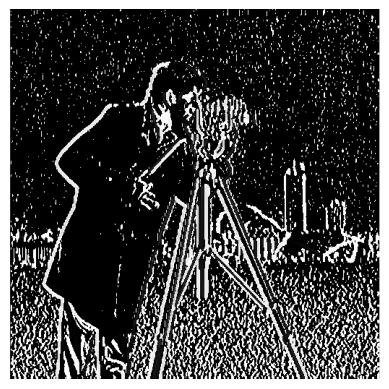

In [22]:
# convolve the image with the kernel (filter)
convImage = convolve2D(image1, kernel)
print(convImage.shape)

plt.imshow(convImage, cmap = 'gray')
plt.axis('off')
plt.show()

In [23]:
# Edge (horizontal) Detection

kernel = np.array([[1, 1, 1], [0,0,0],[-1,-1,-1]])
print(kernel)
fac = reduce(lambda x, y: x*y, np.shape(kernel))
# print(fac)
kernel = kernel / fac
# print(kernel)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


(512, 512)


(-0.5, 511.5, 511.5, -0.5)

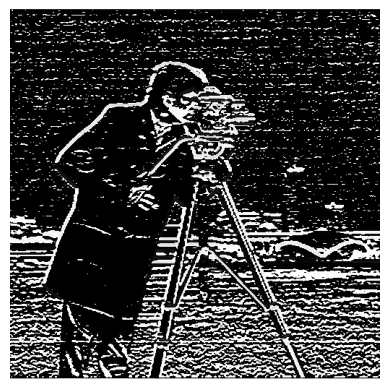

In [24]:
# convolve the image with the kernel (filter)
convImage = convolve2D(image1, kernel)
print(convImage.shape)

plt.imshow(convImage, cmap = 'gray')
plt.axis('off')
plt.show()

batch_size = 2, height = 427, width = 640, channels = 3
filters = [[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
filters = [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


<Figure size 640x640 with 0 Axes>

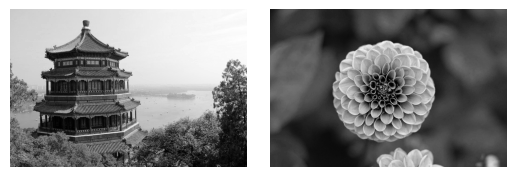

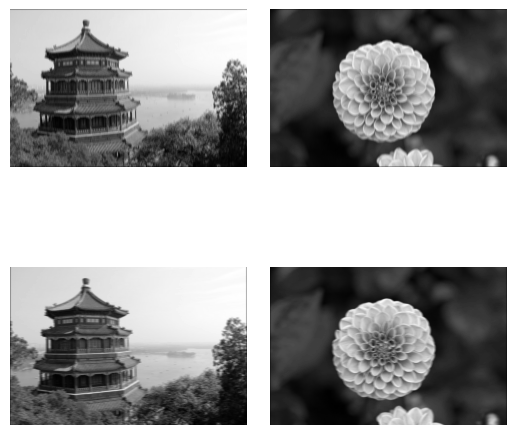

In [39]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# load sample images
china = load_sample_image("china.jpg") / 255.0
flower = load_sample_image("flower.jpg") / 255.0
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(f'batch_size = {batch_size}, height = {height}, width = {width}, channels = {channels}')

# create 2 filters
filters = np.zeros(shape=(7,7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1 # vertical line at column 3
filters[3, :, :, 1] = 1 # horizontal line at row 3

n_rows = 2
n_cols = 2
plt.figure(figsize=(n_cols * 3.2, n_rows * 3.2))
print(f'filters = {filters[:,:,0,0]}')
print(f'filters = {filters[:,:,0,1]}')

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")


n_rows = 1
n_cols = 2
plt.figure(figsize=(n_cols * 3.2, n_rows * 3.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(images[index][:,:,1], cmap="gray") #, interpolation="nearest")
        plt.axis('off')
        # plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# plt.imshow(images[0], cmap="gray")
# plt.imshow(outputs[0,:,:,1], cmap="gray") # plot 1st image's 2nd feature map
# plt.show()

n_rows = 2
n_cols = 2
plt.figure(figsize=(n_cols * 3.2, n_rows * 3.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(outputs[col,:,:,row], cmap="gray") #, interpolation="nearest")
        plt.axis('off')
        # plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## References

Fourier Optics Used for Optical Pattern Recognition

https://www.youtube.com/watch?v=Y9FZ4igNxNA

Ask a Biologist

https://askabiologist.asu.edu/rods-and-cones

National Library of Medicine

https://www.ncbi.nlm.nih.gov/books/NBK10848/#:~:text=Despite%20the%20fact%20that%20perception,throughout%20most%20of%20the%20retina.


